In [2]:
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

We are going to try a few values of N and draw from the PDF of the distribution. In the scipy stats modules this is done in a similar way for both distributions. We'll have a standard range for all so we can compare them easily. Notice how the two distributions look alike as N becomes large. 

Text(0,0.5,'$\\chi^2(x,N)$')

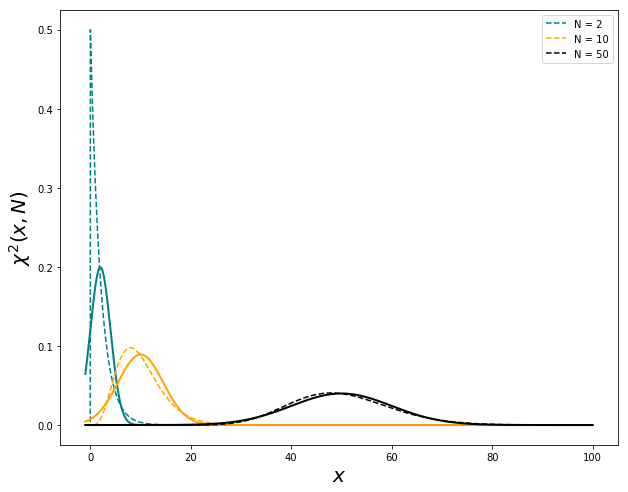

In [3]:
plt.figure(figsize=(10,8))
Nvec =[2,10,50] # our choices for the degrees of freedom
cols=['teal','orange','black']
x = np.linspace(-1, 100, 10000) # generate the x range
for i,n in enumerate(Nvec):    
    chi2 = stats.chi2.pdf(x,n) #draw from the distribution
    plt.plot(x,chi2,'--',label='N = {}'.format(n), color=cols[i])
    #use the stats module to compute the mean, variance etc.
    mean, var, skew, kurt = stats.chi2.stats(n,moments='mvsk') 
    
    # now draw from a normal distribution with that mean, std
    plt.plot(x,stats.norm.pdf(x,loc=mean,scale=np.sqrt(var)), '-',lw=2, color=cols[i])


leg = plt.legend(loc='best')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$\chi^2(x,N)$', fontsize=20)

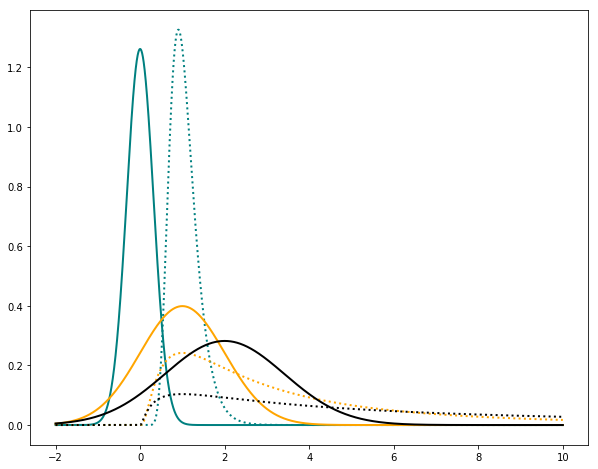

In [6]:
plt.figure(figsize=(10,8))
meanvec = [0,1,2]
varvec = [0.1, 1, 2]
x = np.linspace(-2, 10, 10000) # generate the x range
for i, mean in enumerate(meanvec):
    
    plt.plot(x,stats.norm.pdf(x,loc=mean,scale=np.sqrt(varvec[i])), '-',lw=2, color=cols[i])
    plt.plot(x,stats.lognorm.pdf(x,s=np.sqrt(varvec[i]),scale=np.exp(meanvec[i])), ':',lw=2, color=cols[i])
    meanln, varln, skew, kurt = stats.lognorm.stats(s=np.sqrt(varvec[i]),moments='mvsk')
    #print(meanvec[i],meanln, 'means')
    #print(varvec[i],varln, 'vars')